Pré-processamento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#Constante para substituirmos nos valores de notas ausentes
NOTA_AUSENTE = -5

#Leitura do arquivo da base de dados original
data = pd.read_csv('formatted_data.tsv', sep='\t')

#Filtrando atributos de saída
output_data = data.filter(regex='^permaneceu_ano|^id',axis=1)

#Removendo alunos anteriores aos de 2015
data = data[data.id>20150000000]
output_data = output_data[output_data.id>20150000000]

#Removendo duplicidades e todos atributos qualitativos
input_data = data.groupby('id').mean(numeric_only=True)
output_data = output_data.groupby('id').max()

#Filtrando os atributos de notas
notas = input_data.filter(regex='^media_final',axis=1)

#Filtrando os atributos de faltas
faltas = input_data.filter(regex='^faltas',axis=1)

#Filtrando notas do ensino básico de cada ano
notas_basico_ano1 = notas.filter(regex='_ano1$',axis=1)
notas_basico_ano2 = notas.filter(regex='_ano2$',axis=1)
notas_basico_ano3 = notas.filter(regex='_ano3$',axis=1)
notas_basico_ano4 = notas.filter(regex='_ano4$',axis=1)
###########################################################################################################################################
#Filtrando notas do ensino técnico de cada ano
notas_tecnico_ano1 = notas.filter(regex='_tec-ano1$',axis=1)
notas_tecnico_ano2 = notas.filter(regex='_tec-ano2$',axis=1)
notas_tecnico_ano3 = notas.filter(regex='_tec-ano3$',axis=1)
notas_tecnico_ano4 = notas.filter(regex='_tec-ano4$',axis=1)
###########################################################################################################################################
#Filtrando faltas do ensino básico de cada ano
faltas_basico_ano1 = faltas.filter(regex='_ano1$',axis=1)
faltas_basico_ano2 = faltas.filter(regex='_ano2$',axis=1)
faltas_basico_ano3 = faltas.filter(regex='_ano3$',axis=1)
faltas_basico_ano4 = faltas.filter(regex='_ano4$',axis=1)
###########################################################################################################################################
#Filtrando faltas do ensino técnico de cada ano
faltas_tecnico_ano1 = faltas.filter(regex='_tec-ano1$',axis=1)
faltas_tecnico_ano2 = faltas.filter(regex='_tec-ano2$',axis=1)
faltas_tecnico_ano3 = faltas.filter(regex='_tec-ano3$',axis=1)
faltas_tecnico_ano4 = faltas.filter(regex='_tec-ano4$',axis=1)
###########################################################################################################################################
#Agrupando notas do ensino básico
notas_basico = pd.DataFrame()
notas_basico['nota_basico_ano1'] = notas_basico_ano1.mean(numeric_only=True, axis=1)
notas_basico['nota_basico_ano2'] = notas_basico_ano2.mean(numeric_only=True, axis=1)
notas_basico['nota_basico_ano3'] = notas_basico_ano3.mean(numeric_only=True, axis=1)
notas_basico['nota_basico_ano4'] = notas_basico_ano4.mean(numeric_only=True, axis=1)

#Substituindo lacunas de dados do ano 1 pelas médias dos demais anos
media_basico = notas_basico.mean(numeric_only=True, axis=1)
notas_basico.nota_basico_ano1 = np.where(notas_basico.nota_basico_ano1.isnull(), media_basico, notas_basico.nota_basico_ano1)
###########################################################################################################################################
#Agrupando notas do ensino técnico
notas_tecnico = pd.DataFrame()
notas_tecnico['nota_tecnico_ano1'] = notas_tecnico_ano1.mean(numeric_only=True, axis=1)
notas_tecnico['nota_tecnico_ano2'] = notas_tecnico_ano2.mean(numeric_only=True, axis=1)
notas_tecnico['nota_tecnico_ano3'] = notas_tecnico_ano3.mean(numeric_only=True, axis=1)
notas_tecnico['nota_tecnico_ano4'] = notas_tecnico_ano4.mean(numeric_only=True, axis=1)

#Substituindo lacunas de dados do ano 1 pelas médias dos demais anos
media_tecnico = notas_tecnico.mean(numeric_only=True, axis=1)
notas_tecnico.nota_tecnico_ano1 = np.where(notas_tecnico.nota_tecnico_ano1.isnull(), media_tecnico, notas_tecnico.nota_tecnico_ano1)
###########################################################################################################################################
#Agrupando faltas do ensino básico
faltas_basico = pd.DataFrame()
faltas_basico['faltas_basico_ano1'] = faltas_basico_ano1.mean(numeric_only=True, axis=1)
faltas_basico['faltas_basico_ano2'] = faltas_basico_ano2.mean(numeric_only=True, axis=1)
faltas_basico['faltas_basico_ano3'] = faltas_basico_ano3.mean(numeric_only=True, axis=1)
faltas_basico['faltas_basico_ano4'] = faltas_basico_ano4.mean(numeric_only=True, axis=1)

#Substituindo lacunas de dados do ano 1 pelas médias dos demais anos
media_faltas_basico = faltas_basico.mean(numeric_only=True, axis=1)
faltas_basico.faltas_basico_ano1 = np.where(faltas_basico.faltas_basico_ano1.isnull(), media_faltas_basico, faltas_basico.faltas_basico_ano1)
###########################################################################################################################################
#Agrupando faltas do ensino técnico
faltas_tecnico = pd.DataFrame()
faltas_tecnico['faltas_tecnico_ano1'] = faltas_tecnico_ano1.mean(numeric_only=True, axis=1)
faltas_tecnico['faltas_tecnico_ano2'] = faltas_tecnico_ano2.mean(numeric_only=True, axis=1)
faltas_tecnico['faltas_tecnico_ano3'] = faltas_tecnico_ano3.mean(numeric_only=True, axis=1)
faltas_tecnico['faltas_tecnico_ano4'] = faltas_tecnico_ano4.mean(numeric_only=True, axis=1)

#Substituindo lacunas de dados do ano 1 pelas médias dos demais anos
media_faltas_tecnico = faltas_tecnico.mean(numeric_only=True, axis=1)
faltas_tecnico.faltas_tecnico_ano1 = np.where(faltas_tecnico.faltas_tecnico_ano1.isnull(), media_faltas_tecnico, faltas_tecnico.faltas_tecnico_ano1)
###########################################################################################################################################
#Copiar dados do ano3 para ano4 para turma de 2017
notas_basico.nota_basico_ano4 = np.where(notas_basico.index>20170000000, notas_basico.nota_basico_ano3, notas_basico.nota_basico_ano4)
faltas_basico.faltas_basico_ano4 = np.where(faltas_basico.index>20170000000, faltas_basico.faltas_basico_ano3, faltas_basico.faltas_basico_ano4)
notas_tecnico.nota_tecnico_ano4 = np.where(notas_tecnico.index>20170000000, notas_tecnico.nota_tecnico_ano3, notas_tecnico.nota_tecnico_ano4)
faltas_tecnico.faltas_tecnico_ano4 = np.where(faltas_tecnico.index>20170000000, faltas_tecnico.faltas_tecnico_ano3, faltas_tecnico.faltas_tecnico_ano4)
###########################################################################################################################################
#Concatenando todas as tabelas anteriores num único dataframe

final_data = pd.DataFrame()
final_data = pd.concat([notas_basico, notas_tecnico, faltas_basico, faltas_tecnico], axis=1, join='inner')

#Substituindo valores ausentes por -5
final_data = final_data.fillna(NOTA_AUSENTE)

#Concatenando com atributos de saída
final_data = final_data.join(output_data, on='id', how='inner')

#Exportando a base de dados final para um arquivo .tsv
final_data.to_csv('final_data.tsv', '\t')

Heat map

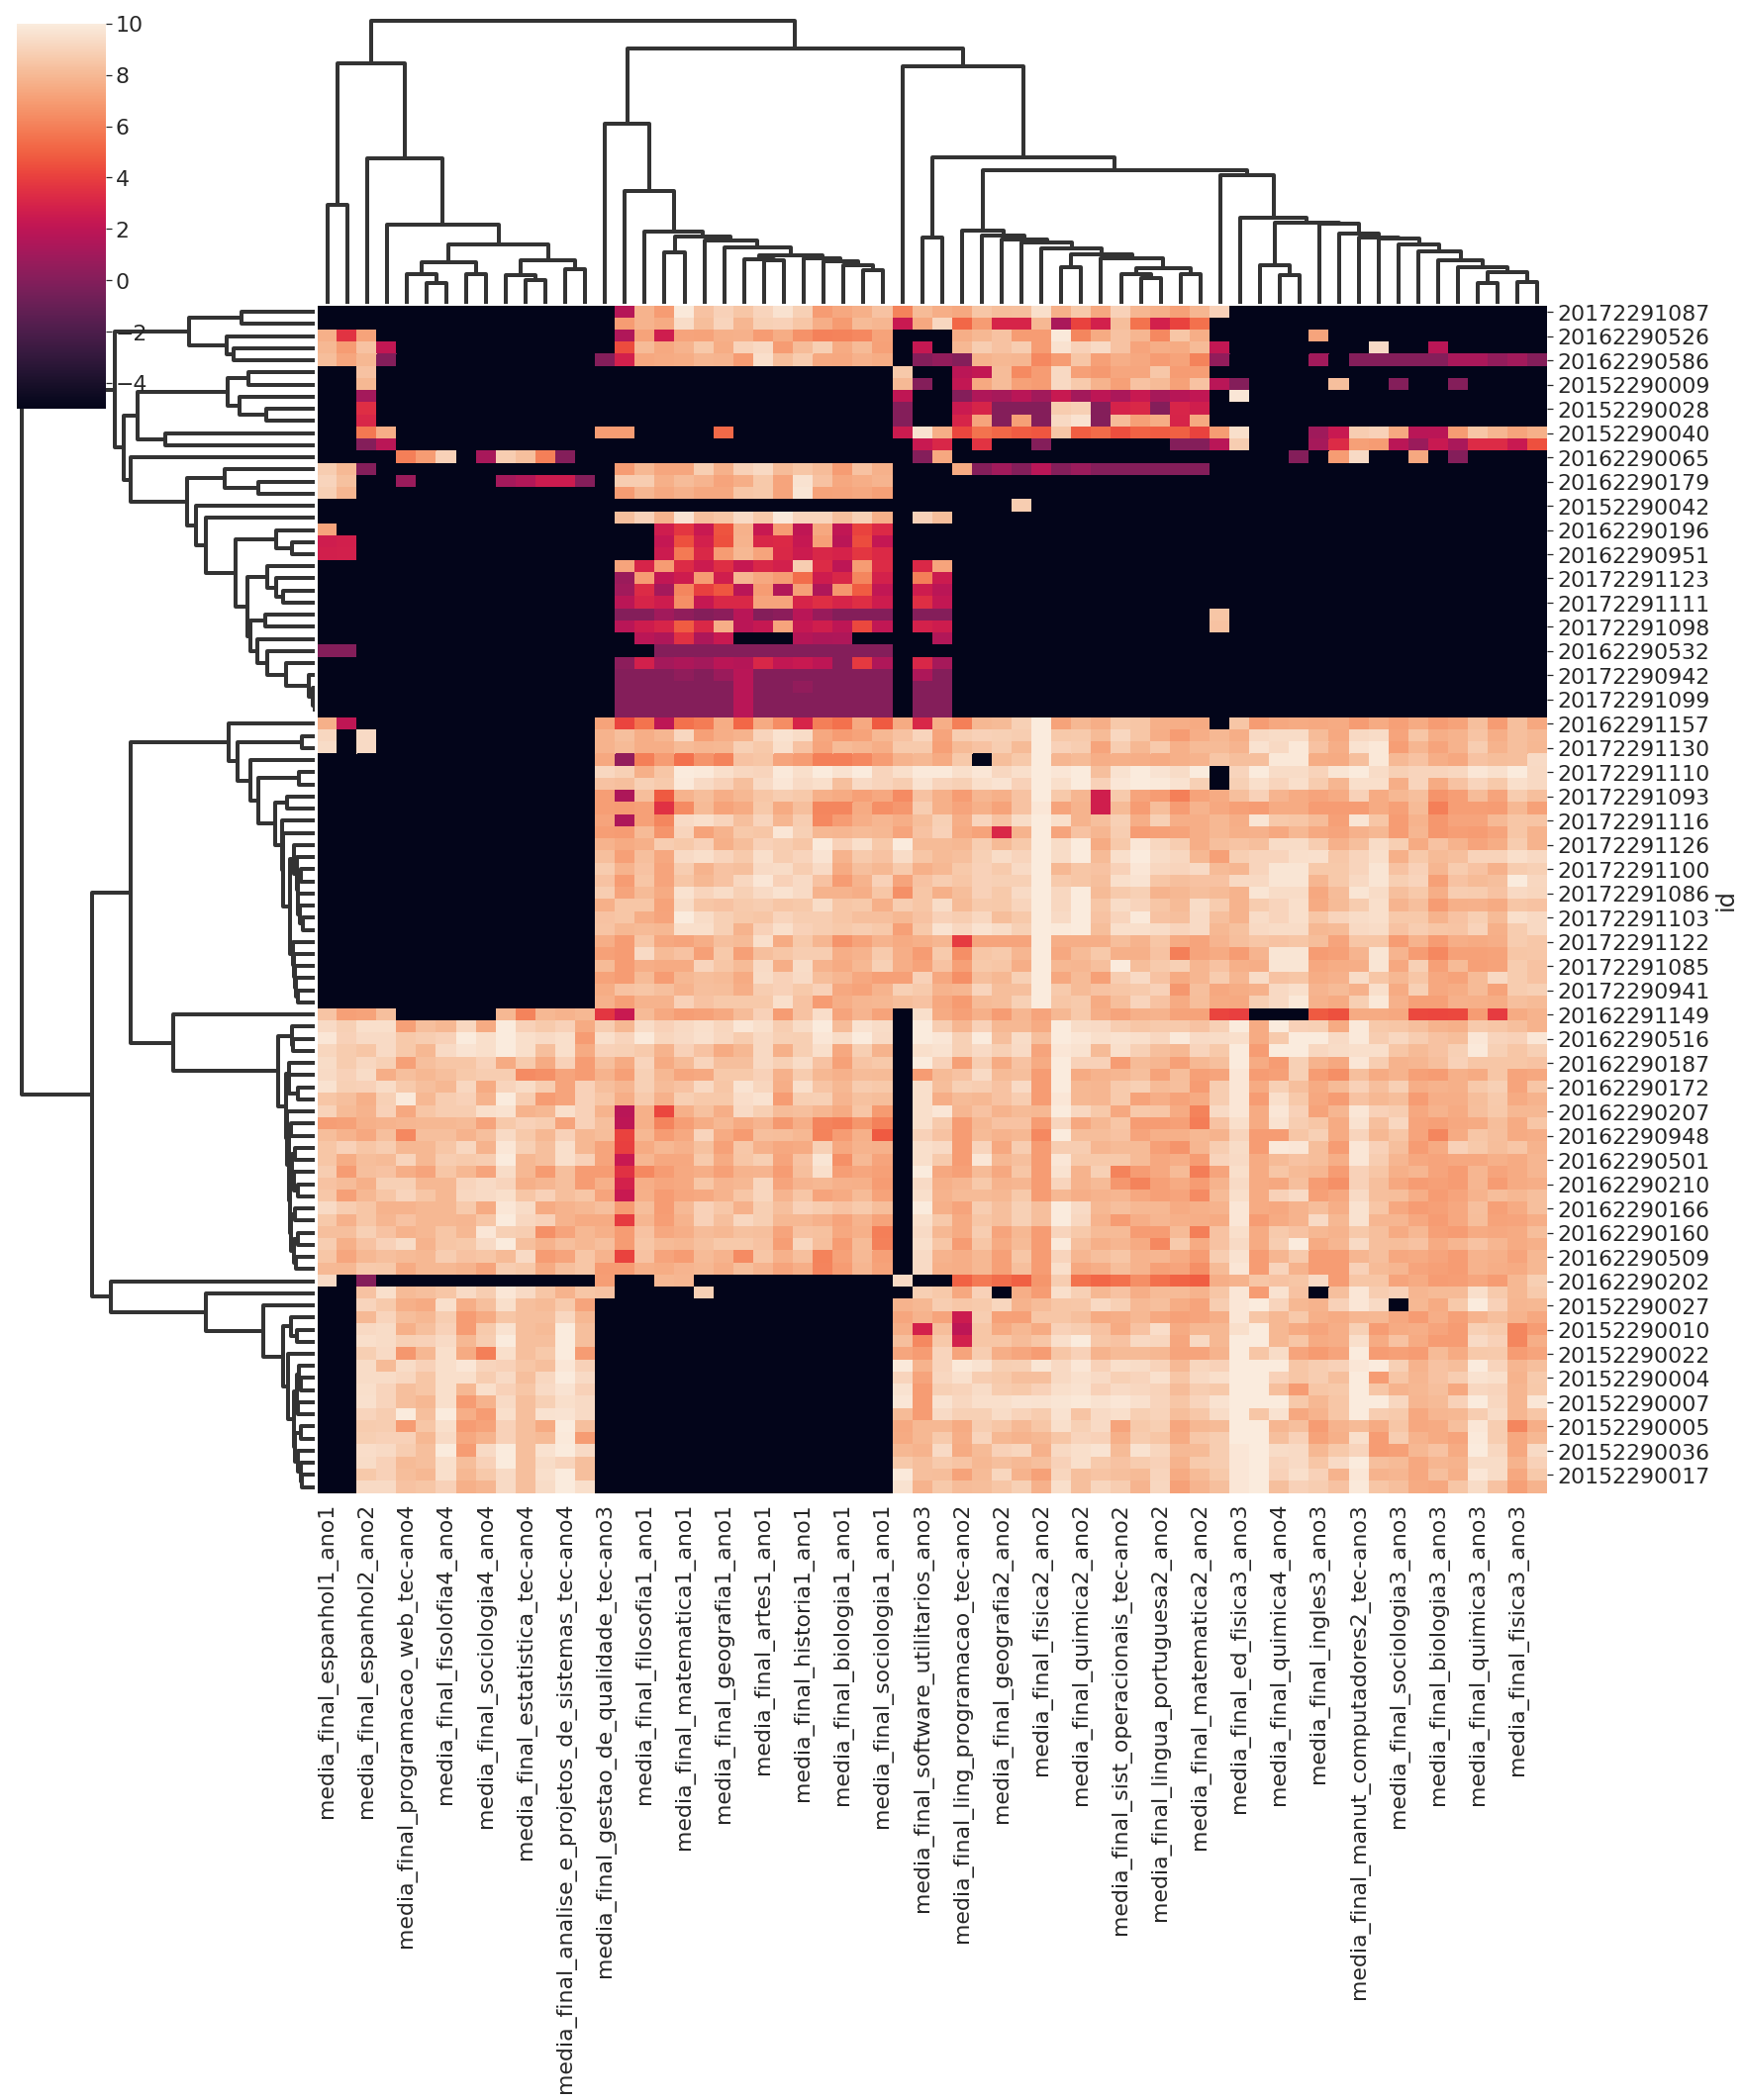

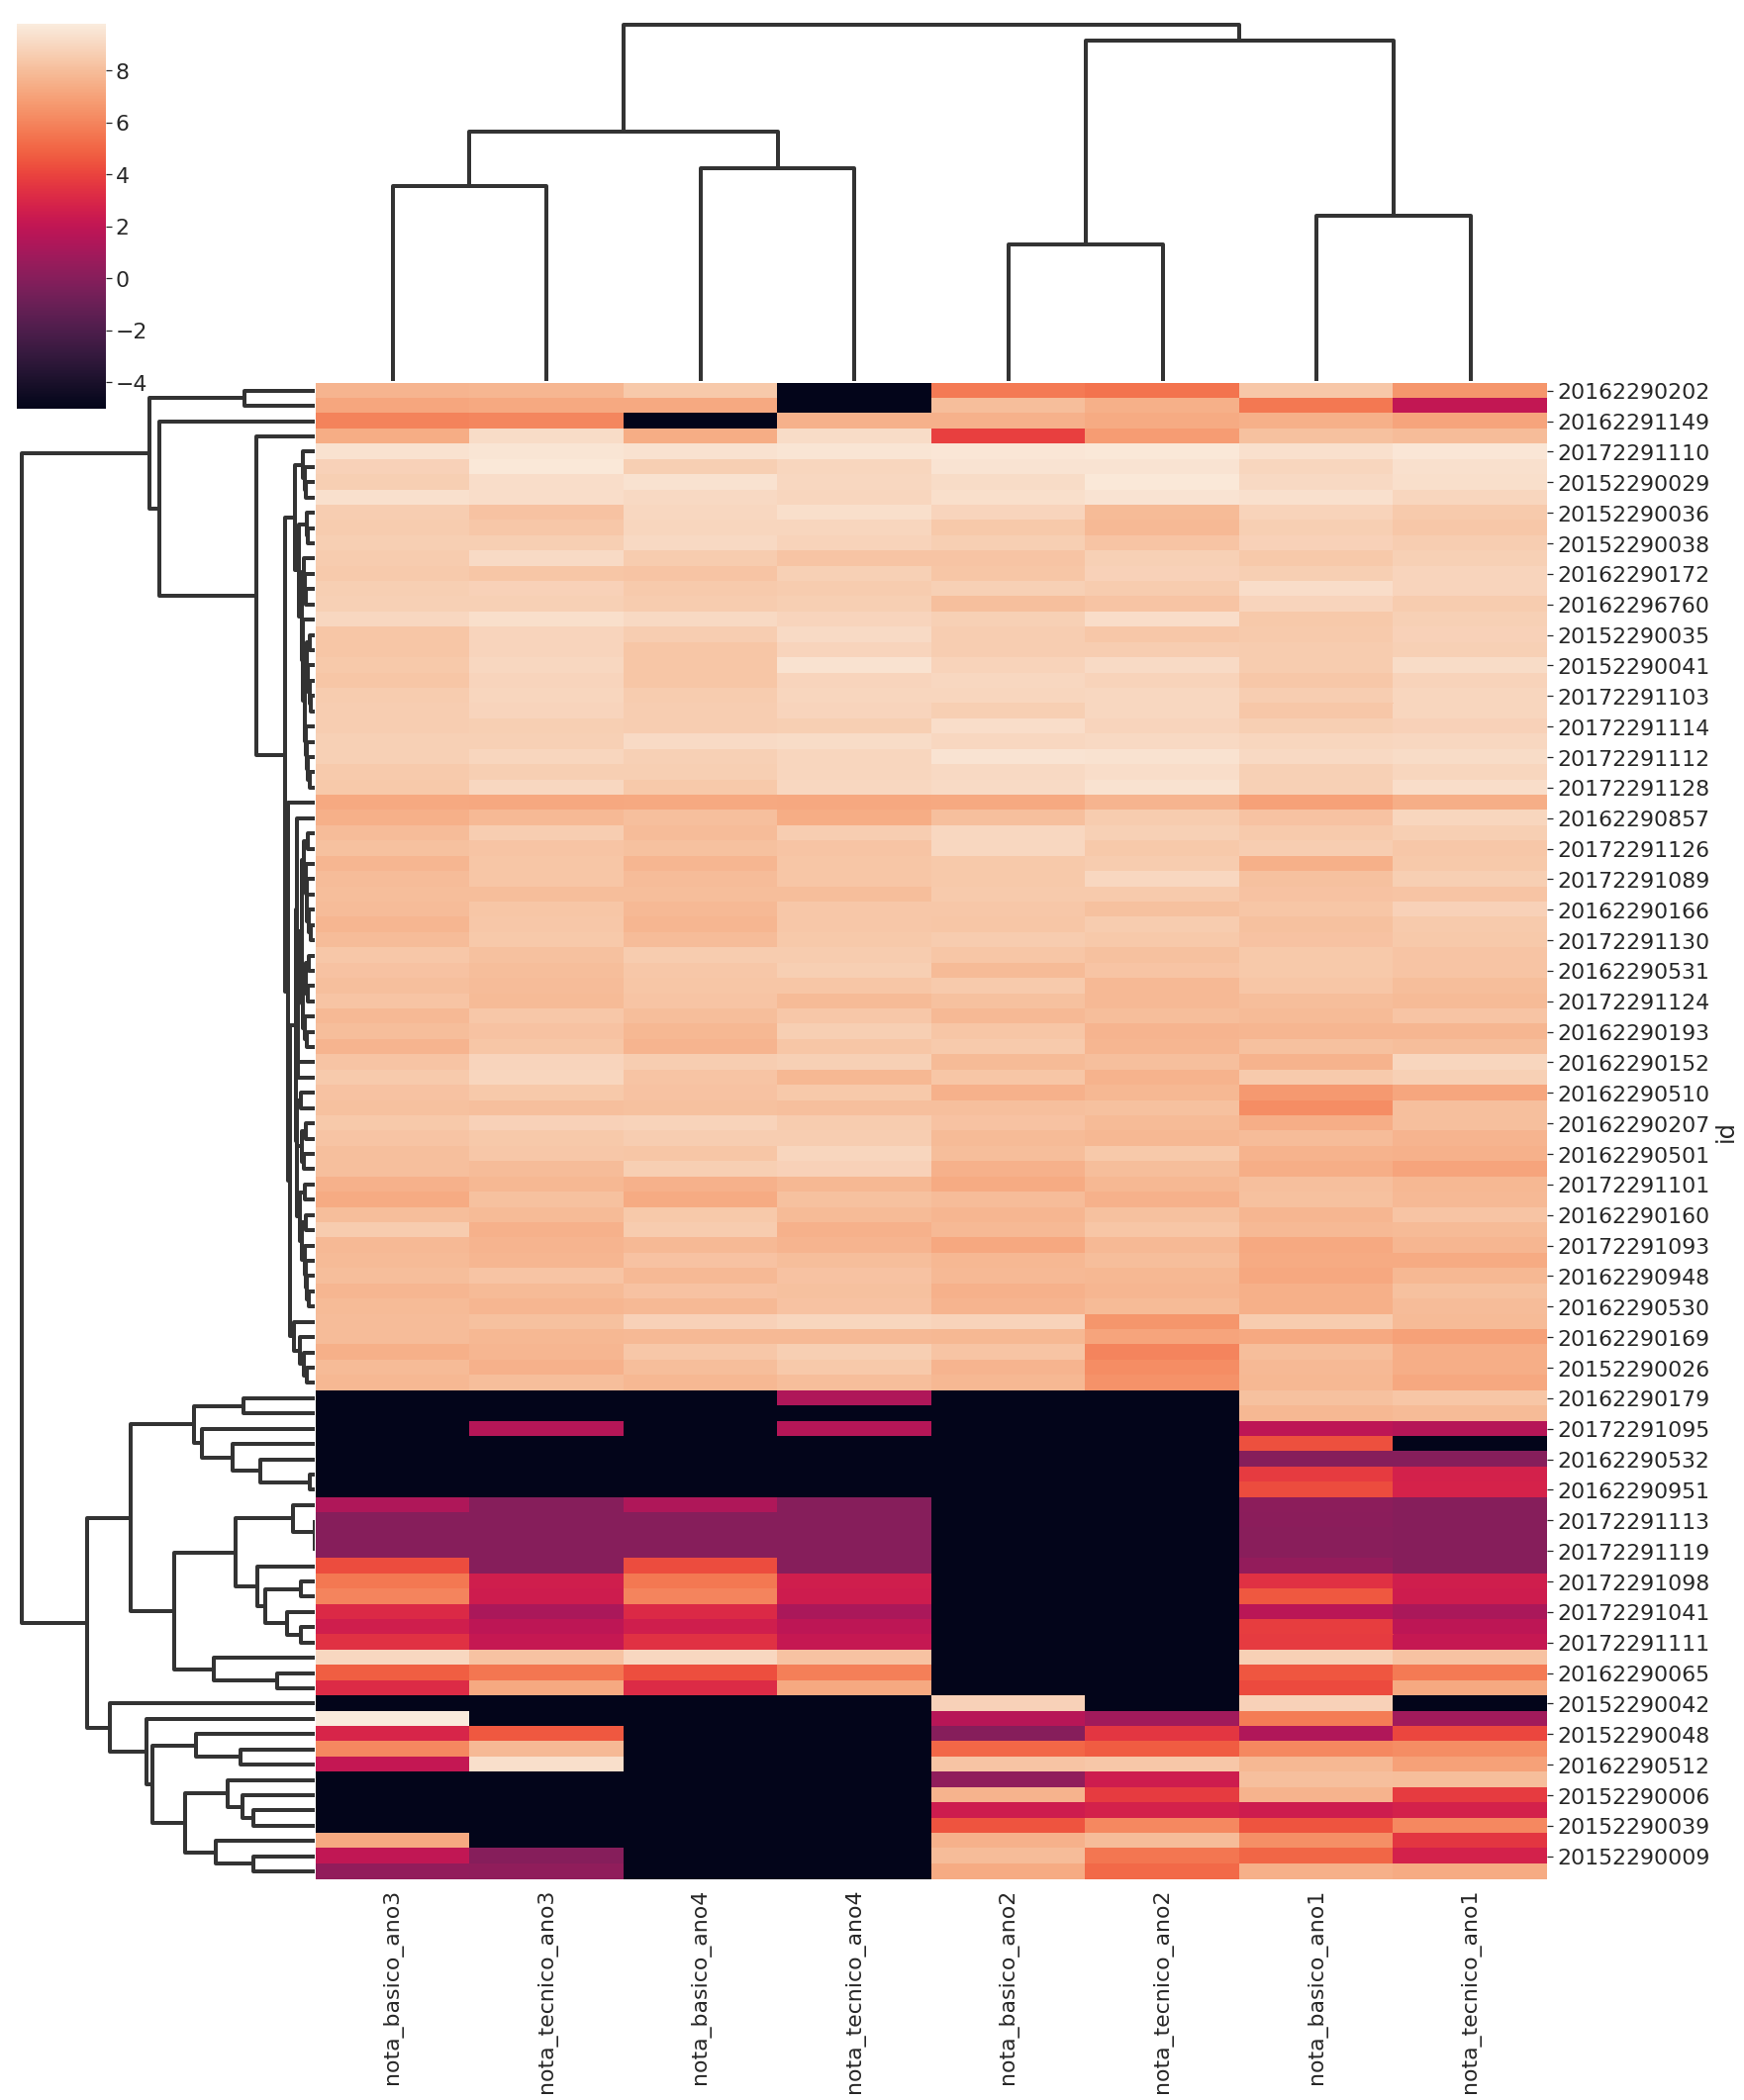

In [ ]:
#Função que plota heat map
def plotClusterMap(dados):
  sns.set(font_scale=2.0)
  g = sns.clustermap(dados, figsize=(25, 30))

  for a in g.ax_row_dendrogram.collections:
      a.set_linewidth(4)

  for a in g.ax_col_dendrogram.collections:
      a.set_linewidth(4)


#Heatmap das notas, sem pré processamento
plotClusterMap(notas.fillna(NOTA_AUSENTE))

#Heatmap da média das notas de cada aluno, após tratamento dos dados
notas_pre_processamento = pd.concat([notas_basico, notas_tecnico], axis=1, join='inner').fillna(NOTA_AUSENTE)
plotClusterMap(notas_pre_processamento)
